#  第五讲 无标度网络【实践】一

In [1]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常
# 关注B站和公众号：单哥的科研日常，获取更多讲解教程

### 实验环境：
### Python版本==3.9.6, networkx==2.6.3, matplotlib==3.5.2, numpy==1.23.1, pandas==1.4.3, scipy==1.9.0

## 1、道路网络和航空网络的度分布

In [2]:
# 导入库
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# 加载euroroad数据集
df1 = pd.read_csv("euroroad.csv")
G1 = nx.from_pandas_edgelist(df1, 'source', 'target', create_using = nx.Graph())

# 加载openflights数据集
df2 = pd.read_csv("openflights.csv")
G2 = nx.from_pandas_edgelist(df2, 'source', 'target', create_using = nx.Graph())

print(len(G1.nodes()), len(G2.nodes()))

1174 3425


In [4]:
# 定义求度分布的函数
def get_pdf(G):
    all_k = [G.degree(i) for i in G.nodes()]
    k = list(set(all_k))  # 获取所有可能的度值
    N = len(G.nodes())
    
    Pk = []
    for ki in sorted(k):
        c = 0
        for i in G.nodes():
            if G.degree(i) == ki:  
                c += 1  
        Pk.append(c/N)     
    
    return sorted(k), Pk

In [5]:
deg1 = [G1.degree(i) for i in G1.nodes()]
deg2 = [G2.degree(i) for i in G2.nodes()]

k1, Pk1 = get_pdf(G1)
k2, Pk2 = get_pdf(G2)

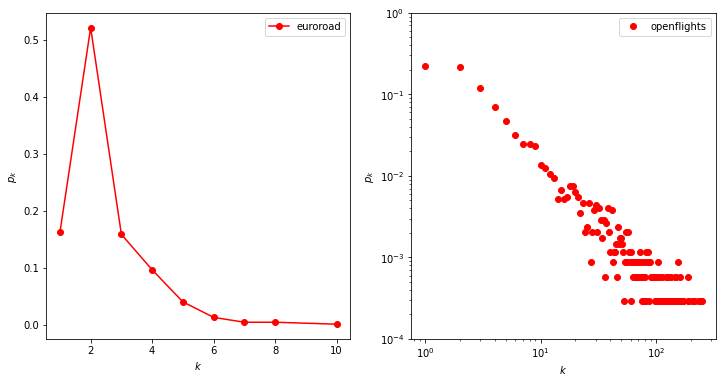

In [6]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(k1, Pk1, 'ro-', label='euroroad')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")

plt.subplot(122)
plt.plot(k2, Pk2, 'ro', label='openflights')
plt.legend(loc=0)
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-4,1])
plt.xscale("log")
plt.yscale("log")

## 2、对于航空网络，粗略拟合度分布

In [7]:
from scipy import optimize

In [8]:
def fit_line(x, a, b):
    return a * x + b

斜率 a =  -1.366312420298909


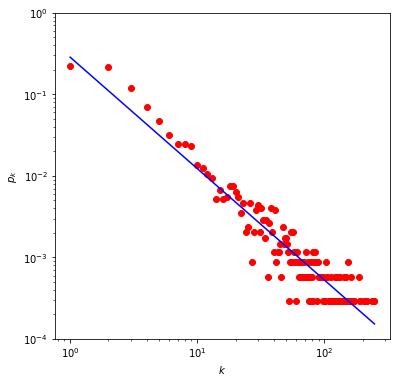

In [10]:
x = np.log10(np.array(k2))
y = np.log10(np.array(Pk2))

kmin2, kmax2 = min(deg2), max(deg2)
# 拟合
a, b = optimize.curve_fit(fit_line, x, y)[0]
print("斜率 a = ", a)

x1 = np.arange(kmin2, kmax2, 0.01)
y1 = (10**b) * (x1 ** a)

plt.figure(figsize=(6,6))
plt.plot(k2, Pk2, 'ro')
plt.plot(x1, y1, 'b-')
plt.xlabel("$k$")
plt.ylabel("$p_k$")
plt.ylim([1e-4,1])
plt.xscale("log")
plt.yscale("log")

In [11]:
import powerlaw
# 安装：pip install powerlaw

In [12]:
data = [G2.degree(i) for i in G2.nodes()]
print(max(data))

fit = powerlaw.Fit(data)
print(fit)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

248
Calculating best minimal value for power law fit
kmin: 2.0
gamma: 1.9028919860606162
D: 0.05721869113396072


<AxesSubplot:>

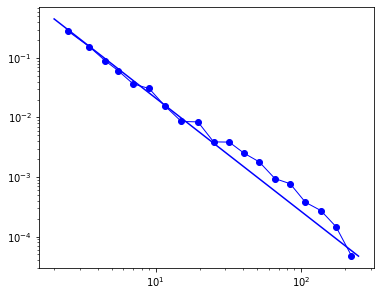

In [13]:
plt.figure(figsize=[6, 4.8])
fig = fit.plot_pdf(marker = 'o', color='b', linewidth=1)
fit.power_law.plot_pdf(color='b', linestyle='-', ax=fig)

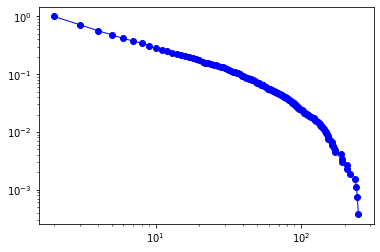

In [14]:
fig = fit.plot_ccdf(marker = 'o', color='b', linewidth=1)

## 3、生成符合幂律分布的度序列

In [15]:
from networkx.utils import powerlaw_sequence

In [16]:
degree_seq = powerlaw_sequence(10000, exponent=2.5)
int_deg = [int(di) for di in degree_seq]
# print(int_deg)

In [17]:
fit = powerlaw.Fit(int_deg)
print(fit)
kmin = fit.power_law.xmin
print("kmin:", kmin)
print("gamma:", fit.power_law.alpha)
print("D:", fit.power_law.D)

Calculating best minimal value for power law fit
kmin: 13.0
gamma: 2.8352828986507204
D: 0.03231375482510257


<AxesSubplot:>

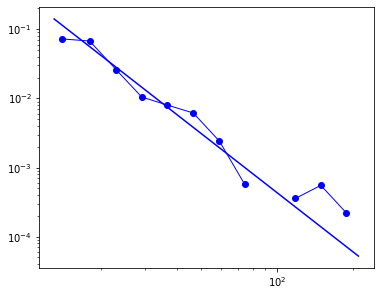

In [18]:
plt.figure(figsize=[6, 4.8])
fig = fit.plot_pdf(marker = 'o', color='b', linewidth=1)
fit.power_law.plot_pdf(color='b', linestyle='-', ax=fig)